# Intelligent System Project

## Vladi Valsecchi mat. 730030

## Gianluca Molteni mat.730113

In [1]:
#pandas
import pandas as pd
#numpy
import numpy as np
from numpy.linalg import norm
#sklearn
from sklearn.datasets import load_iris, load_wine
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets
#scipy
from scipy.spatial.distance import *
#IPhyton
from IPython.core.display import display, HTML
#plotly
import plotly.graph_objs as go
import plotly.express as px
#seaborn
import seaborn as sns
#matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
#pylab
import pylab as pl
#nest_asyncio
import nest_asyncio
nest_asyncio.apply()

In [2]:
#import functions
%run functions.ipynb
print(test_util())

Import complete


-----------------------------------
## Dataset selection:
- sklearn iris
- sklearn wine

In [3]:
raw_iris=load_iris()#import sklearn dataset

descRaw(raw_iris)#dataset description

iris=pandasConverter(raw_iris)#convert dataset to dataframe
iris.head(5)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target   class  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa

In [4]:
raw_wine=load_wine()#import sklearn dataset

descRaw(raw_wine)#dataset description

wine=pandasConverter(raw_wine)#convert dataset to dataframe
wine.head(5)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target    class  
0                          3.92   1065.0       0  class_0  
1                          3.40   1050.0       0  class_0  
2                          3.17   1185.0       0  class_0  
3                          3.45   1480.0       0  class_0  
4                          2.93    735.0       0  class_0

Check missing values

In [5]:
wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64

In [6]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
class                0
dtype: int64

---------------------------
## FEATURE EXTRACTION AND SELECTION

--------------------------
### Correlation matrix

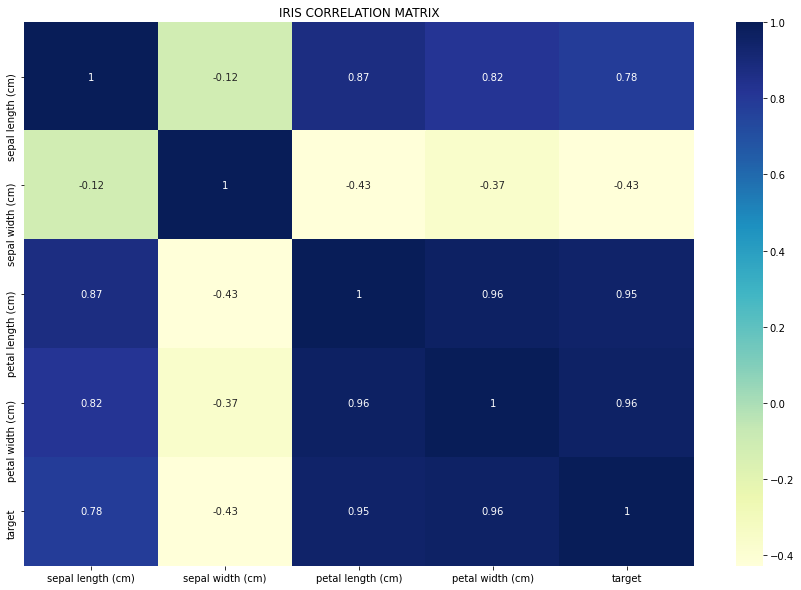

In [7]:
corrMatrix(iris,"iris")

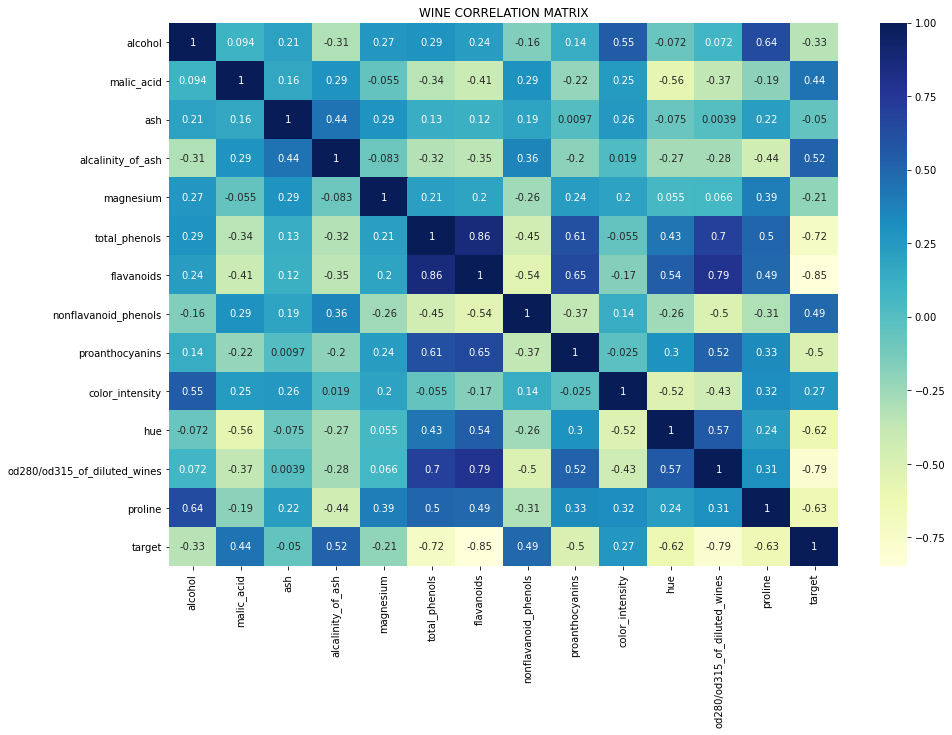

In [8]:
corrMatrix(wine,"wine")

--------------------
### K Best Features

In [9]:
new_iris=KbestRaw(raw_iris, iris)#generate dataframe with only the selected features

                 ftr       score          pval
0  sepal length (cm)   10.817821  4.476515e-03
1   sepal width (cm)    3.710728  1.563960e-01
2  petal length (cm)  116.312613  5.533972e-26
3   petal width (cm)   67.048360  2.758250e-15
kbest:  ['petal length (cm)' 'petal width (cm)']


D:\Programmi\ANALconda\envs\gerry_scotti\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
new_wine=KbestRaw(raw_wine, wine)#generate dataframe with only the selected features

                             ftr         score          pval
0                        alcohol      5.445499  6.569389e-02
1                     malic_acid     28.068605  8.034890e-07
2                            ash      0.743381  6.895678e-01
3              alcalinity_of_ash     29.383695  4.163050e-07
4                      magnesium     45.026381  1.669728e-10
5                  total_phenols     15.623076  4.050346e-04
6                     flavanoids     63.334308  1.766565e-14
7           nonflavanoid_phenols      1.815485  4.034340e-01
8                proanthocyanins      9.368283  9.240664e-03
9                color_intensity    109.016647  2.124887e-24
10                           hue      5.182540  7.492483e-02
11  od280/od315_of_diluted_wines     23.389883  8.335878e-06
12                       proline  16540.067145  0.000000e+00
kbest:  ['color_intensity' 'proline']


D:\Programmi\ANALconda\envs\gerry_scotti\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
#print new datasets
print(new_iris)
print(new_wine)

     petal length (cm)  petal width (cm)  target
0                  1.4               0.2       0
1                  1.4               0.2       0
2                  1.3               0.2       0
3                  1.5               0.2       0
4                  1.4               0.2       0
..                 ...               ...     ...
145                5.2               2.3       2
146                5.0               1.9       2
147                5.2               2.0       2
148                5.4               2.3       2
149                5.1               1.8       2

[150 rows x 3 columns]
     color_intensity  proline  target
0               5.64   1065.0       0
1               4.38   1050.0       0
2               5.68   1185.0       0
3               7.80   1480.0       0
4               4.32    735.0       0
..               ...      ...     ...
173             7.70    740.0       2
174             7.30    750.0       2
175            10.20    835.0       2
176     

In [12]:
fig = px.scatter(iris, x="petal length (cm)", y="petal width (cm)", color="class",
                 size='petal length (cm)', hover_data=['petal width (cm)'],
                template="plotly_dark",
                title="Class disposition for Iris dataframe with selected features")
fig.show()

In [13]:
fig = px.scatter(wine, x="color_intensity", y="proline", color="class",
                 size='color_intensity', hover_data=['proline'],
                template="plotly_dark",
                title="Class disposition for Wine dataframe with selected features")

fig.show()

DATAFRAME CLASSIFICATION
---------------------

SELECTED CLASSIFIERS:
------------
- Minimum Distance Classifier
- KNearestNeighbors

MINIMUM DISTANCE CLASSIFIER
---------------------

In [14]:
#set dataframes
dataframes = {
    'Iris'          : new_iris,
    'Wine'          : new_wine,
}

#dsInfo(datasets)

Train/test split of 70%/30%;

40 independent train/test splits;

Performance metric: accuracy.

In [15]:
#hyperparameters
n_resamplings = 40
test_size = 0.3

In [16]:
#chosen metrics
eu='euclidean'
ci='cityblock'
ch='chebyshev'

In [17]:
resultsE=mdcScore(dataframes,n_resamplings, test_size,eu)#accuracy score euclidean

Iris euclidean done
Wine euclidean done


In [18]:
resultsC=mdcScore(dataframes,n_resamplings,test_size,ci)#accuracy score cityblock

Iris cityblock done
Wine cityblock done


In [19]:
resultsCH=mdcScore(dataframes,n_resamplings, test_size,ch)#accuracy score chessboard

Iris chebyshev done
Wine chebyshev done


Accuracy boxplot for MDC
---------

In [20]:
accBox(dataframes, resultsE, eu)#euclidean accuracy boxplot

In [21]:
accBox(dataframes, resultsC, ci)#cityblock accuracy boxplot

In [22]:
accBox(dataframes, resultsCH, ch)#chessboard accuracy boxplot

Plane division
-------

MDC Euclidean


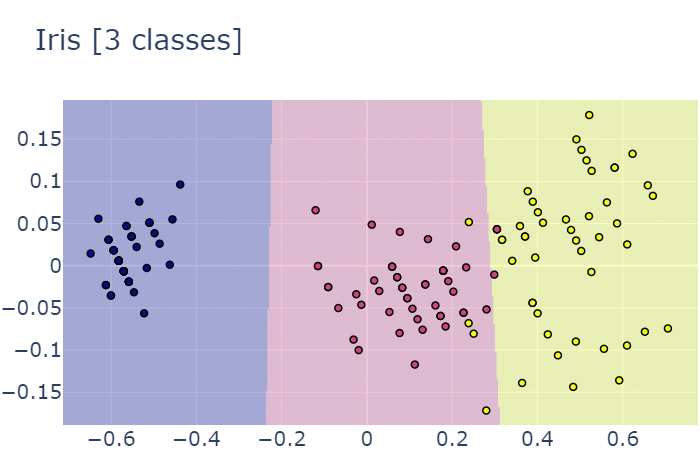

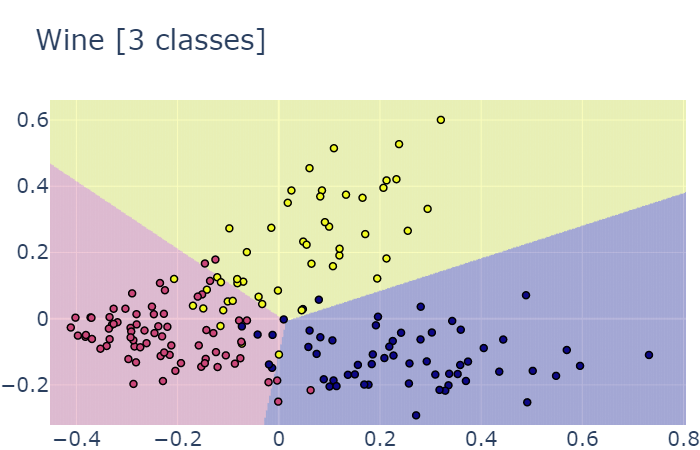

In [23]:
division(dataframes, eu)#division for MDC euclidean

MDC Cityblock


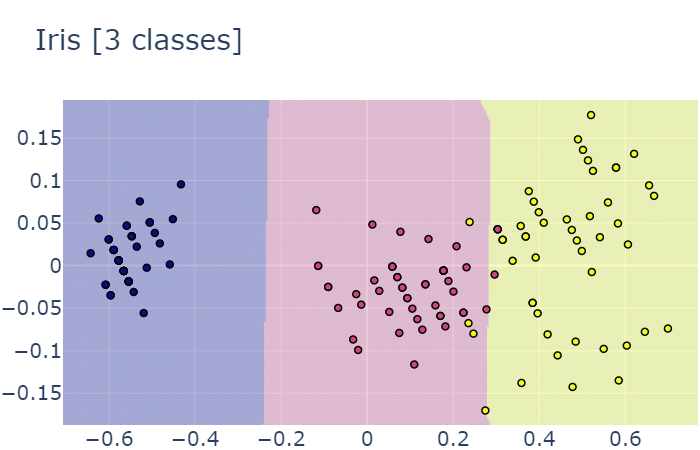

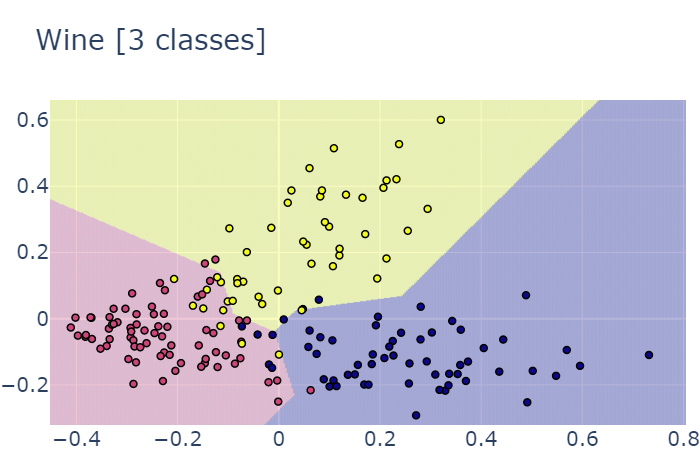

In [24]:
division(dataframes, ci)#division for MDC cityblock

MDC Chessboard


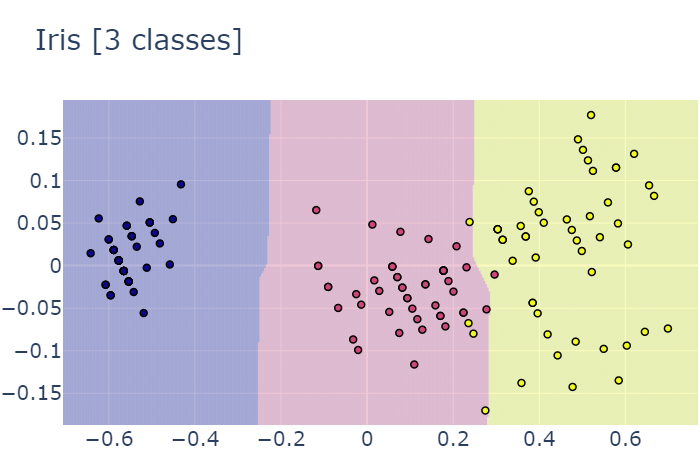

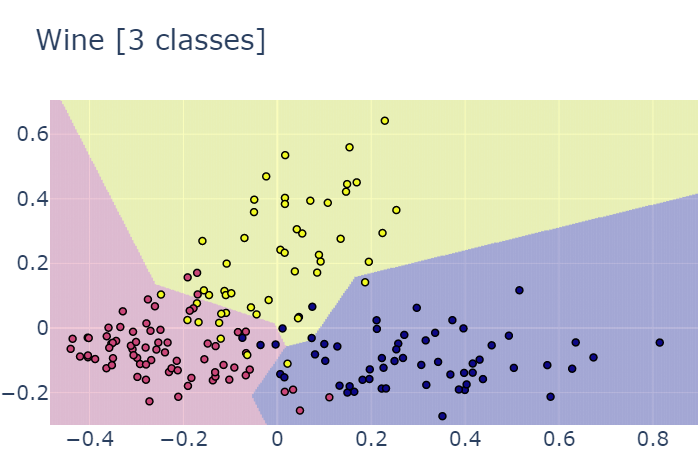

In [25]:
division(dataframes, ch)#division for MDC chessboard

KNN
-----------------

KNN Iris
-------------

In [26]:
test_size=0.3

In [27]:
X_train,X_test,y_train,y_test=knnPreSplit(new_iris,test_size)#train/test split

In [28]:
k=5 #general k for example

In [29]:
classifier,y_pred=knnPred(k,X_train,y_train,X_test)#prediction

In [30]:
knnEval(y_test,y_pred)#evaluation for k=5

[[12  0  0]
 [ 0 18  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



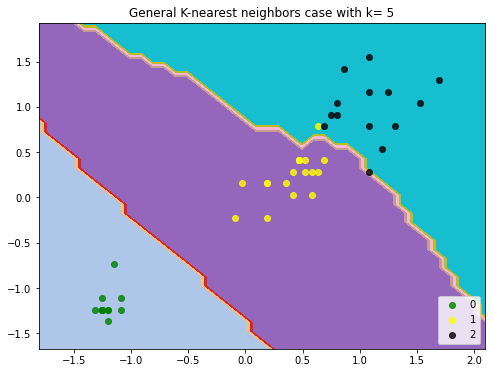

In [31]:
plotKNN(X_train,X_test,y_train,y_test,k, iris['target'].unique(), "general")#plot of the division plane

Variation of K
---------

In [32]:
accuracyTrainI=varKtrain(X_train,y_train,X_test,y_test)#Train variation
accuracyTestI=varKtest(X_train,y_train,X_test,y_test)#Test variation

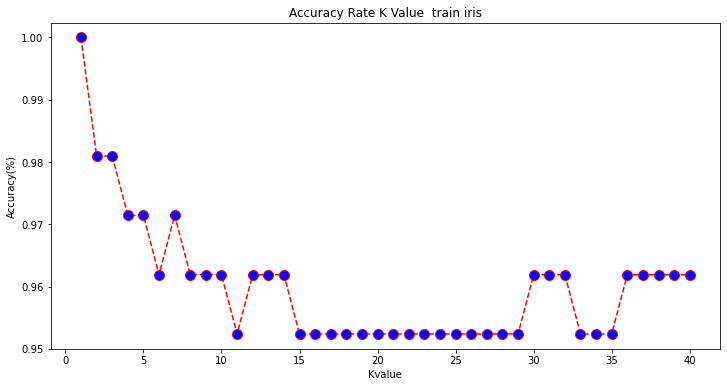

In [33]:
plotVarK(accuracyTrainI," train iris")#plot train variation

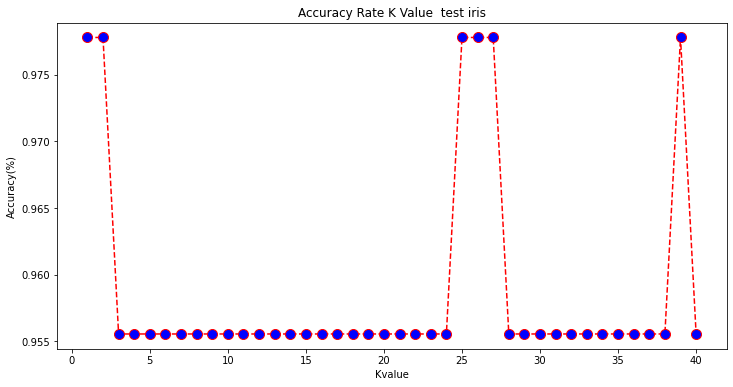

In [34]:
plotVarK(accuracyTestI," test iris")#plot test variation

In [35]:
low,high=knnLowHigh(accuracyTestI)#get a good k and a bad k

A K with low accuracy: 
20
A K with high accuracy: 
1


[[12  0  0]
 [ 0 18  1]
 [ 0  1 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.95      0.95      0.95        19
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



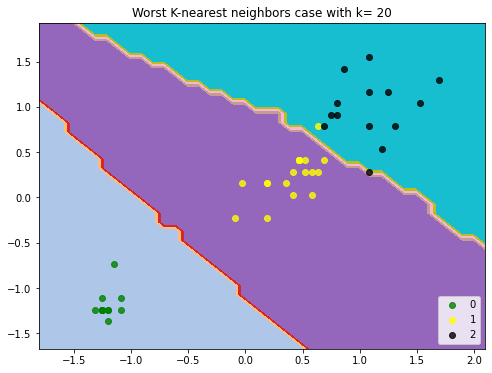

In [36]:
#low accuracy k case
k=low
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
plotKNN(X_train,X_test,y_train,y_test,k,iris['target'].unique(),"low")

[[12  0  0]
 [ 0 18  1]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.95      0.97        19
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



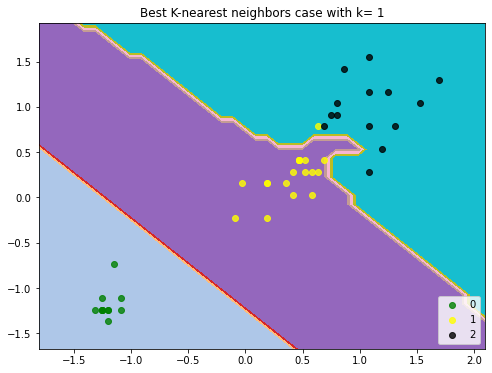

In [37]:
#high accuracy k
k=high
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
plotKNN(X_train,X_test,y_train,y_test,k, iris['target'].unique(),"high")

In [38]:
#boxplots for accuracy in train and test set
dfTrI = accuracyDf(accuracyTrainI)
dfTeI = accuracyDf(accuracyTestI)
BoxCompare(dfTeI, dfTrI, "Iris")

KNN Wine
------

In [39]:
X_train,X_test,y_train,y_test=knnPreSplit(new_wine,test_size)#train/test split

In [40]:
k=5 #general k for example

In [41]:
classifier,y_pred=knnPred(k,X_train,y_train,X_test)#prediction

In [42]:
knnEval(y_test,y_pred)#evaluation for k=5

[[16  0  0]
 [ 2 18  3]
 [ 1  0 14]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.78      0.88        23
           2       0.82      0.93      0.87        15

    accuracy                           0.89        54
   macro avg       0.89      0.91      0.89        54
weighted avg       0.90      0.89      0.89        54



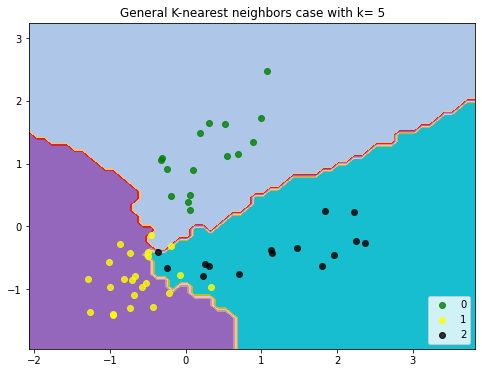

In [43]:
plotKNN(X_train,X_test,y_train,y_test,k, new_wine['target'].unique(),"general")#plot of the division plane

Variation of K
---------

In [44]:
accuracyTrainW=varKtrain(X_train,y_train,X_test,y_test)#Train variation
accuracyTestW=varKtest(X_train,y_train,X_test,y_test)#Test variation

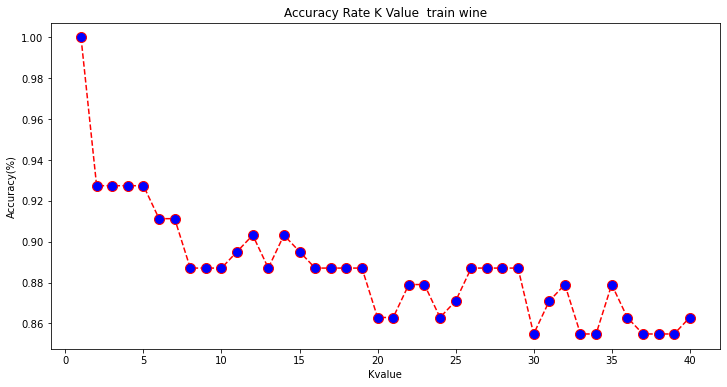

In [45]:
plotVarK(accuracyTrainW," train wine")#plot train variation

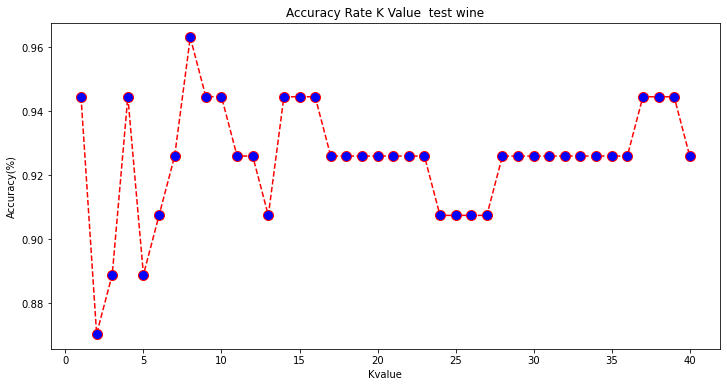

In [46]:
plotVarK(accuracyTestW," test wine")#plot test variation

In [47]:
low,high=knnLowHigh(accuracyTestW)#get a good k and a bad k

A K with low accuracy: 
2
A K with high accuracy: 
8


[[16  0  0]
 [ 3 20  0]
 [ 1  3 11]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       0.87      0.87      0.87        23
           2       1.00      0.73      0.85        15

    accuracy                           0.87        54
   macro avg       0.89      0.87      0.87        54
weighted avg       0.89      0.87      0.87        54



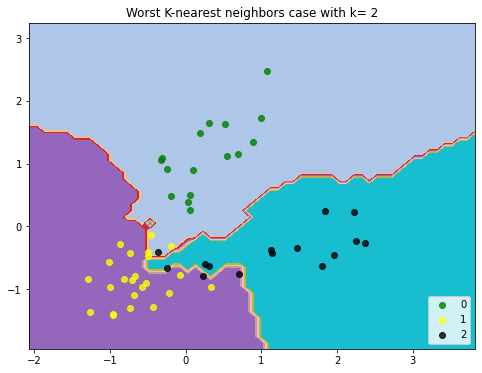

In [48]:
#Low accuracy k case
k=low
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
plotKNN(X_train,X_test,y_train,y_test,k, new_wine['target'].unique(),"low")

[[16  0  0]
 [ 0 21  2]
 [ 0  0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        23
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



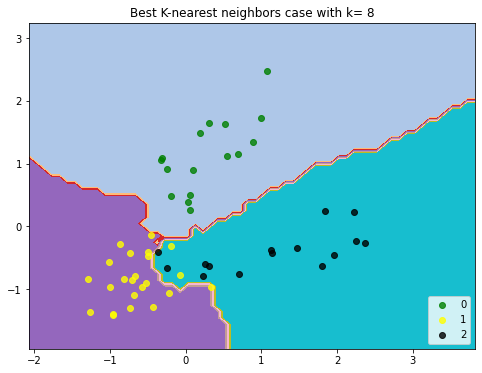

In [49]:
#High accuracy k case
k=high
classifier,y_pred=knnPred(k,X_train,y_train,X_test)
knnEval(y_test,y_pred)
plotKNN(X_train,X_test,y_train,y_test,k, new_wine['target'].unique(),"high")

In [50]:
#boxplots for accuracy in train and test set
dfTrW = accuracyDf(accuracyTrainW)
dfTeW = accuracyDf(accuracyTestW)
BoxCompare(dfTeW, dfTrW, "Wine")